In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.bbox"] = 'tight'
np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

In [2]:
columns = ["year", "month", "decimal date", "average", "interpolated", "trend", "?"]
co2 = pd.read_csv("ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt",
                  delim_whitespace=True, skiprows=72, names=columns, parse_dates=[[0, 1]])


In [3]:
co2.head()

,year_month,decimal date,average,interpolated,trend,?
0,1958-03-01,1958.208,315.71,315.71,314.62,-1
1,1958-04-01,1958.292,317.45,317.45,315.29,-1
2,1958-05-01,1958.375,317.50,317.50,314.71,-1
3,1958-06-01,1958.458,-99.99,317.10,314.85,-1
4,1958-07-01,1958.542,315.86,315.86,314.98,-1


In [4]:
co2.set_index("year_month", inplace=True)

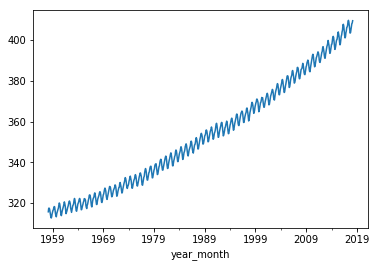

In [5]:
co2.interpolated.plot()

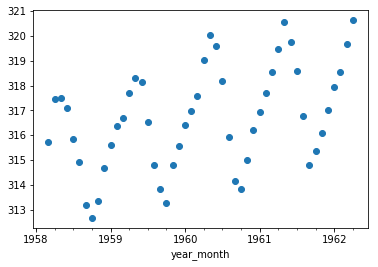

In [6]:
co2.interpolated[:50].plot(marker="o", linestyle="none")

# uneven time series from volcanic erruptions

In [7]:
volcano = pd.read_csv("https://www.ngdc.noaa.gov/nndc/struts/results?type_0=Exact&query_0=$HAZ_EVENT_ID&t=102557&s=50&d=54&dfn=volerup.txt",
                      delimiter="\t", parse_dates=[["Year", "Month", "Day"]])

In [8]:
volcano[-10:]

,Year_Month_Day,TSU,EQ,Name,Location,Country,Latitude,Longitude,Elevation,Type,...,TOTAL_DEATHS,TOTAL_DEATHS_DESCRIPTION,TOTAL_MISSING,TOTAL_MISSING_DESCRIPTION,TOTAL_INJURIES,TOTAL_INJURIES_DESCRIPTION,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_DAMAGE_DESCRIPTION,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DESTROYED_DESCRIPTION
806,2017 9 23,NaN,NaN,Aoba,Vanuatu-SW Pacific,Vanuatu,-15.400,167.830,1496,Shield volcano,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
807,2017 12 18,NaN,NaN,Merapi,Java,Indonesia,-7.542,110.442,2947,Stratovolcano,...,8.0,1.0,NaN,NaN,8.0,1.0,NaN,NaN,NaN,NaN
808,2017 12 27,NaN,NaN,Sinabung,Sumatra,Indonesia,3.170,98.392,2460,Stratovolcano,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
809,2018 1 5,NaN,NaN,Kadovar,New Guinea-NE of,Papua New Guinea,-3.620,144.620,365,Stratovolcano,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
810,2018 1 13,NaN,NaN,Mayon,Luzon-Philippines,Philippines,13.257,123.685,2462,Stratovolcano,...,NaN,NaN,NaN,NaN,1972.0,4.0,3.72,2.0,NaN,NaN
811,2018 1 23,NaN,NaN,Kusatsu-Shirane,Honshu-Japan,Japan,36.620,138.550,2176,Stratovolcano,...,1.0,1.0,NaN,NaN,11.0,1.0,NaN,1.0,NaN,NaN
812,2018 2 1,NaN,NaN,Kilauea,Hawaiian Is,United States,19.425,-155.292,1222,Shield volcano,...,1.0,1.0,NaN,NaN,3.0,1.0,NaN,NaN,NaN,NaN
813,2018 2 9,TSU,NaN,Kadovar,New Guinea-NE of,Papua New Guinea,-3.620,144.620,365,Stratovolcano,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
814,2018 3 21,NaN,NaN,Ijen,Java,Indonesia,-8.058,114.242,2799,Stratovolcano,...,NaN,NaN,NaN,NaN,30.0,1.0,NaN,NaN,NaN,NaN
815,2018 4 nan,NaN,NaN,Aoba,Vanuatu-SW Pacific,Vanuatu,-15.400,167.830,1496,Shield volcano,...,4.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0


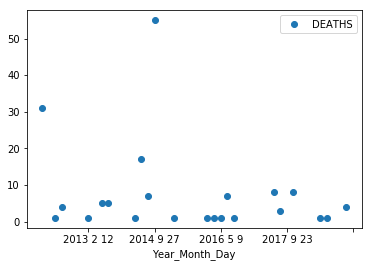

In [9]:
volcano[-50:].plot("Year_Month_Day", "DEATHS", marker="o", linestyle="none")

In [10]:
ppm = co2.interpolated

In [11]:
ppm.head()

year_month
1958-03-01    315.71
1958-04-01    317.45
1958-05-01    317.50
1958-06-01    317.10
1958-07-01    315.86
Name: interpolated, dtype: float64

In [12]:
ppm.autocorr()

0.9989725896336374

In [13]:
ppm.autocorr(lag=12)

0.999748036319571

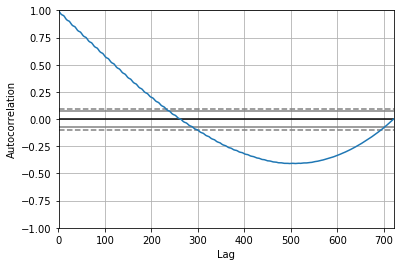

In [14]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(ppm)

/home/andy/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


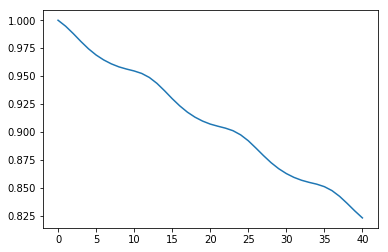

In [15]:
from statsmodels.tsa.stattools import acf
autocorrelation = acf(ppm)
plt.plot(autocorrelation)

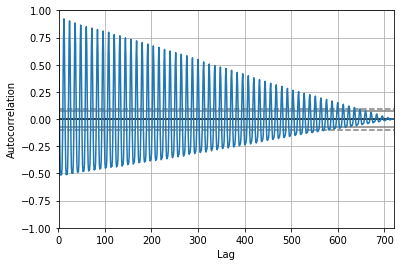

In [16]:
autocorrelation_plot(ppm.diff()[1:])

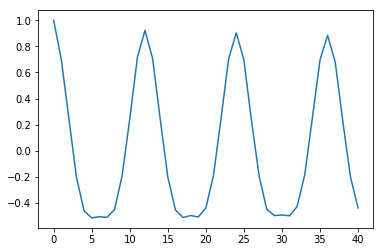

In [17]:
from statsmodels.tsa.stattools import acf
autocorrelation = acf(ppm.diff()[1:])
plt.plot(autocorrelation)

In [18]:
aapl = pd.read_csv("https://github.com/scikit-learn/examples-data/raw/master/financial-data/AAPL.csv")

In [19]:
aapl.head()

,date,open,close
0,2003-01-02,14.36,14.80
1,2003-01-03,14.80,14.90
2,2003-01-06,15.03,14.90
3,2003-01-07,14.79,14.85
4,2003-01-08,14.58,14.55


In [20]:
aapl.set_index("date", inplace=True)
aapl.sort_index(inplace=True)

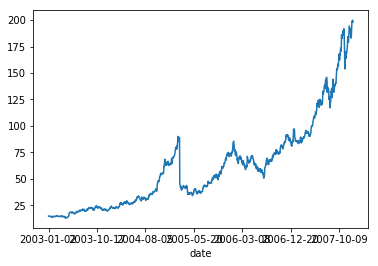

In [21]:
aapl.close.plot()

In [22]:
msft = pd.read_csv("https://github.com/scikit-learn/examples-data/raw/master/financial-data/MSFT.csv", parse_dates=["date"], index_col='date')

In [23]:
yhoo = pd.read_csv("https://github.com/scikit-learn/examples-data/raw/master/financial-data/YHOO.csv", parse_dates=["date"])

In [24]:
yhoo.set_index("date", inplace=True)
yhoo.sort_index(inplace=True)

In [25]:
combined_stock = pd.concat([yhoo.close, aapl.close, msft.close], axis=1)

In [26]:
combined_stock.columns = ['YHOO', 'AAPL', 'MSFT']

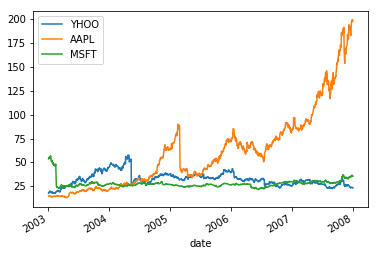

In [27]:
combined_stock.plot()

In [28]:
yhoo.close.autocorr()

0.9879423052246649

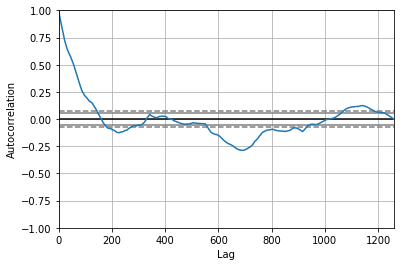

In [29]:
autocorrelation_plot(yhoo)


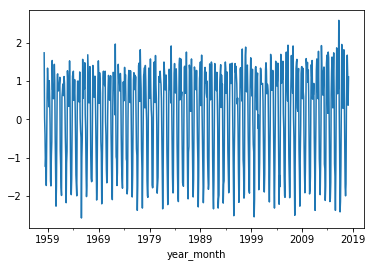

In [30]:
ppm.diff().plot()

# Seasonal model for co2

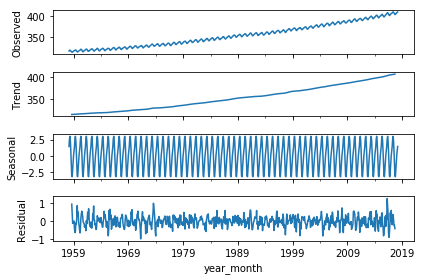

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ppm, model='additive')
fig = decomposition.plot()
#fig.set_figheight(6)
fig.tight_layout()

In [32]:
ppm.shape

(721,)

# Autoregressive models

In [33]:
from statsmodels.tsa import ar_model
ar = ar_model.AR(ppm[:500])
res = ar.fit(maxlag=12)
res.params

const              -2.017437
L1.interpolated     0.932357
L2.interpolated    -0.241231
L3.interpolated    -0.099021
L4.interpolated    -0.075787
L5.interpolated     0.163810
L6.interpolated    -0.000482
L7.interpolated    -0.023311
L8.interpolated    -0.125047
L9.interpolated     0.100309
L10.interpolated   -0.021890
L11.interpolated    0.415633
L12.interpolated   -0.017931
dtype: float64

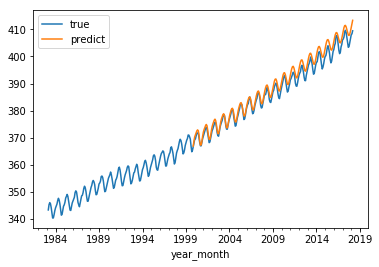

In [34]:
ppm[300:].plot(label="true")
res.predict(ppm.index[500], ppm.index[-1]).plot(label="predict")
plt.legend(loc="best")

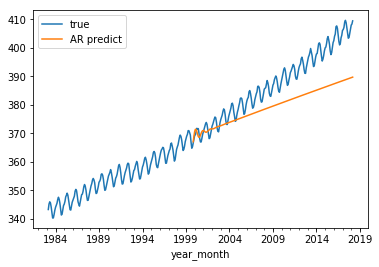

In [35]:
ar6 = ar_model.AR(ppm[:500])
res = ar6.fit(maxlag=6)
ar_pred = res.predict(ppm.index[500], ppm.index[-1])
ppm[300:].plot(label="true")
ar_pred.plot(label="AR predict")
plt.legend(loc="best")


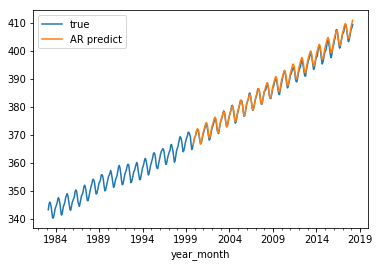

In [36]:
ar25 = ar_model.AR(ppm[:500])
res = ar25.fit(maxlag=25)
ar_pred = res.predict(ppm.index[500], ppm.index[-1])
ppm[300:].plot(label="true")
ar_pred.plot(label="AR predict")
plt.legend(loc="best")


/home/andy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/home/andy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/home/andy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/andy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of iss

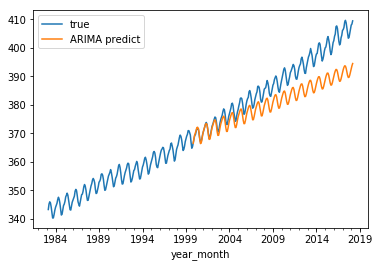

In [37]:
from statsmodels import tsa

arima_model = tsa.arima_model.ARIMA(ppm[:500], order=(12, 1, 0))
res = arima_model.fit()
arima_pred = res.predict(ppm.index[500], ppm.index[-1], typ="levels")
ppm[300:].plot(label="true")
arima_pred.plot(label="ARIMA predict")
plt.legend(loc="best")

# building our own model

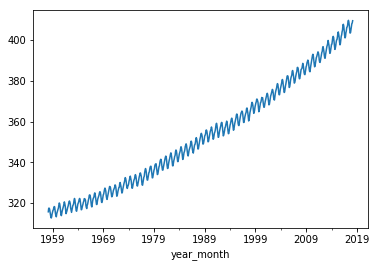

In [38]:
ppm.plot()

In [39]:
ppm.shape

(721,)

In [40]:
train = ppm[:500]
test = ppm[500:]

In [41]:
X = ppm.index.to_series().apply(lambda x: x.toordinal())
X = pd.DataFrame(X)

X_train, X_test = X.iloc[:500, :], X.iloc[500:, :]
X_train.shape

(500, 1)

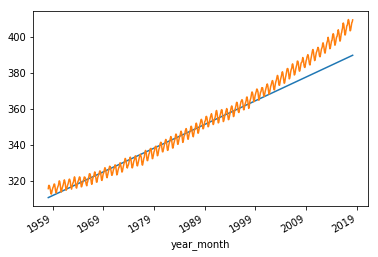

In [42]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, train)
lr_pred = lr.predict(X_test)
plt.plot(ppm.index, lr.predict(X))
ppm.plot()

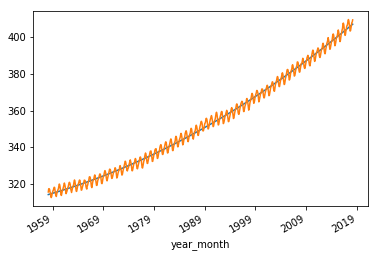

In [43]:
from sklearn.preprocessing import PolynomialFeatures
lr_poly = make_pipeline(PolynomialFeatures(include_bias=False), LinearRegression())
lr_poly.fit(X_train, train)

plt.plot(ppm.index, lr_poly.predict(X))
ppm.plot()

# cross-validation

In [44]:
X_train.head()

,year_month
year_month,
1958-03-01,714839
1958-04-01,714870
1958-05-01,714900
1958-06-01,714931
1958-07-01,714961
1958-08-01,714992
1958-09-01,715023
1958-10-01,715053
1958-11-01,715084


In [45]:
from sklearn.model_selection import cross_val_score, TimeSeriesSplit
scores_iid = cross_val_score(LinearRegression(), X_train, train, cv=10,
                             scoring="neg_mean_squared_error")
np.mean(scores_iid)

-9.836161660519492

In [46]:
scores_time = cross_val_score(LinearRegression(), X_train, train, cv=TimeSeriesSplit(n_splits=10),
                              scoring="neg_mean_squared_error")
np.mean(scores_time)

-10.295872343008863

In [47]:
from sklearn.tree import DecisionTreeRegressor
scores_iid = cross_val_score(DecisionTreeRegressor(), X_train, train, cv=10,
                              scoring="neg_mean_squared_error")
np.mean(scores_iid)

-14.680391799999972

In [48]:
scores_time = cross_val_score(DecisionTreeRegressor(), X_train, train, cv=TimeSeriesSplit(n_splits=10),
                              scoring="neg_mean_squared_error")
np.mean(scores_time)

-16.470823999999986

In [49]:
from sklearn.model_selection import cross_val_predict
asdf = cross_val_predict(LinearRegression(), X_train.values, train.values, cv=10)

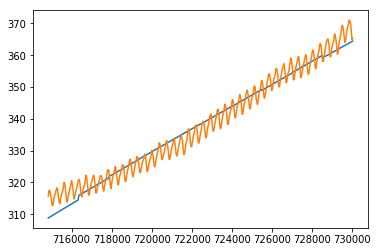

In [73]:
plt.plot(X_train, asdf)
plt.plot(X_train, train)

In [51]:
y_res = ppm - lr_poly.predict(X)

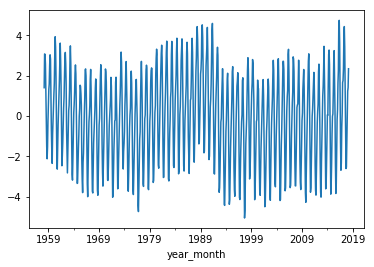

In [52]:
y_res.plot()

In [53]:
from statsmodels.tsa import arima_model
ar_model = arima_model.ARMA(ppm[:500].diff()[1:], order=(12, 0))
res = ar_model.fit()

/home/andy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/home/andy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/home/andy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [54]:
ar_pred = res.predict(ppm.index[500], ppm.index[-1])
pred_arma_diff = np.cumsum(ar_pred) + ppm[500]

/home/andy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


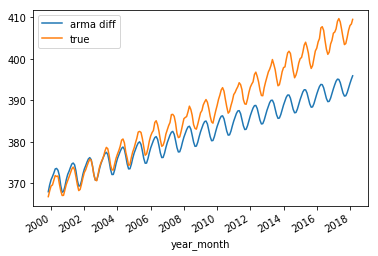

In [55]:
plt.plot(ppm.index[500:], pred_arma_diff, label="arma diff")
ppm[500:].plot(label="true")
plt.legend()

In [56]:
from statsmodels.tsa import ar_model
ar_model_res = ar_model.AR(y_res[:500])
res_res = ar_model_res.fit(maxlag=12)

ar_pred_res = res_res.predict(ppm.index[500], ppm.index[-1])
pred_ar_res = ar_pred_res + lr_poly.predict(X_test)

In [57]:
res_res.params

const              -0.008036
L1.interpolated     0.923109
L2.interpolated    -0.243610
L3.interpolated    -0.101150
L4.interpolated    -0.076836
L5.interpolated     0.157413
L6.interpolated    -0.006107
L7.interpolated    -0.023728
L8.interpolated    -0.126291
L9.interpolated     0.092687
L10.interpolated   -0.026260
L11.interpolated    0.415070
L12.interpolated   -0.018739
dtype: float64

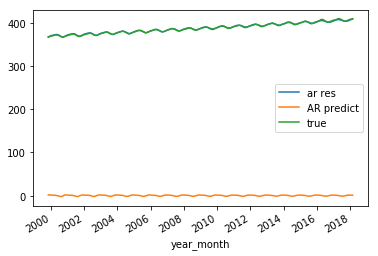

In [58]:
plt.plot(ppm.index[500:], pred_ar_res, label="ar res")
ar_pred.plot(label="AR predict")
ppm[500:].plot(label="true")

plt.legend(loc="best")

In [59]:
X_month = pd.concat([X, pd.DataFrame({'month': X.index.month}, index=X.index)], axis=1)

In [60]:
X_month.head()

,year_month,month
year_month,,
1958-03-01,714839,3
1958-04-01,714870,4
1958-05-01,714900,5
1958-06-01,714931,6
1958-07-01,714961,7


In [61]:
X_train_month = X_month[:500]
X_test_month = X_month[500:]
lr_poly_month = make_pipeline(PolynomialFeatures(include_bias=False), LinearRegression())
lr_poly_month.fit(X_train_month, train)
X_test_month.shape

(221, 2)

In [62]:
from statsmodels.tsa import ar_model
arma_model_res = arima_model.ARMA(y_res[:500], order=(12, 0))
res_arma_res = arma_model_res.fit(maxlag=12)

arma_pred_res = res_arma_res.predict(ppm.index[500], ppm.index[-1])
pred_arma_res = arma_pred_res + lr_poly.predict(X_test)

/home/andy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/home/andy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/home/andy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/andy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of iss

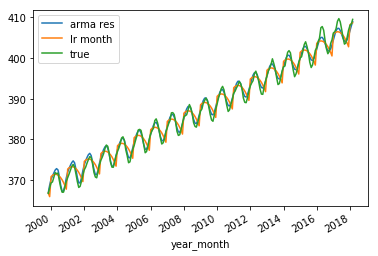

In [63]:
plt.plot(ppm.index[500:], pred_arma_res, label="arma res")
plt.plot(ppm.index[500:], lr_poly_month.predict(X_test_month), label="lr month")

ppm[500:].plot(label="true")
plt.legend(loc="best")

In [64]:
from sklearn.preprocessing import OneHotEncoder
lr_poly_month_ohe = make_pipeline(OneHotEncoder(categorical_features=[1], sparse=False),
                                  PolynomialFeatures(include_bias=False), LinearRegression())
lr_poly_month_ohe.fit(X_train_month, train)

Pipeline(memory=None,
     steps=[('onehotencoder', OneHotEncoder(categorical_features=[1], dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=False)), ('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

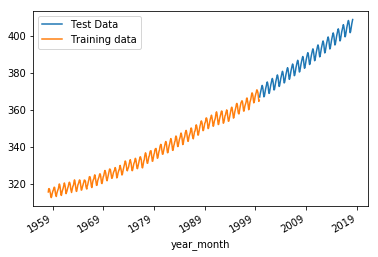

In [65]:
plt.plot(ppm.index[500:], lr_poly_month_ohe.predict(X_test_month), label="lr month")
ppm[:500].plot()
plt.legend(["Test Data", "Training data"])

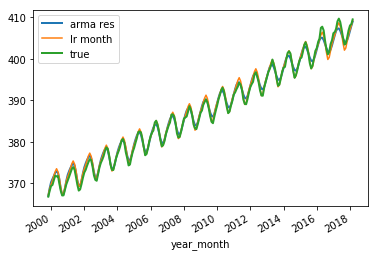

In [66]:
plt.plot(ppm.index[500:], pred_arma_res, label="arma res", linewidth=2)
plt.plot(ppm.index[500:], lr_poly_month_ohe.predict(X_test_month), label="lr month")

ppm[500:].plot(label="true", ax=plt.gca(), linewidth=2)
plt.legend(loc="best")


In [67]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ppm[500:], lr_poly_month_ohe.predict(X_test_month))

0.5072699069959642

In [68]:
mean_squared_error(ppm[500:], pred_arma_res)

0.74909241718202

# FBProphet

In [95]:
fb_ppm = pd.DataFrame(ppm).reset_index()
fb_ppm.columns = ['ds', 'y']

In [96]:
fb_ppm.head()

,ds,y
0,1958-03-01,315.71
1,1958-04-01,317.45
2,1958-05-01,317.50
3,1958-06-01,317.10
4,1958-07-01,315.86


In [98]:
from fbprophet import Prophet
m = Prophet()
m.fit(fb_ppm[:500])


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/andy/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [103]:
forecast = m.predict(fb_ppm)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
716,2017-11-01,395.945925,371.764533,418.387796
717,2017-12-01,397.214965,372.869843,419.607040
718,2018-01-01,398.240162,373.669132,420.561246
719,2018-02-01,399.030550,374.025203,421.746566
720,2018-03-01,399.903766,375.122335,422.798774


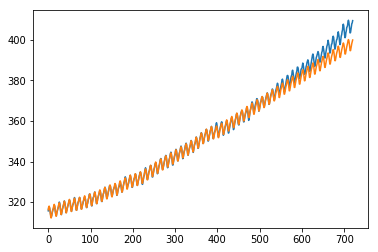

In [108]:
fb_ppm.y.plot()
forecast.yhat.plot()
plt.savefig("images/prophet_forecast.png")

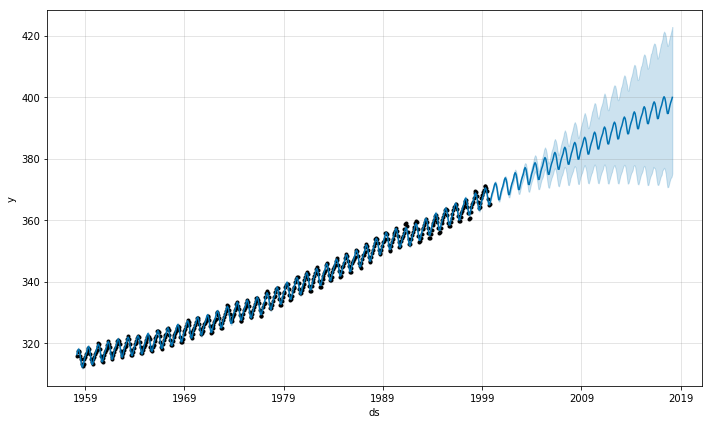

In [109]:
m.plot(forecast);
plt.savefig("images/prophet_forecast_uncertainty.png")

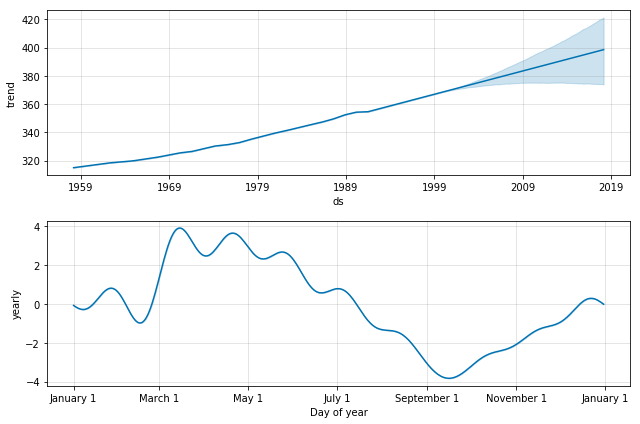

In [110]:
m.plot_components(forecast);
plt.savefig("images/prophet_forecast_components.png")

# Classification

In [69]:
from scipy.io import arff

In [74]:
data = arff.loadarff("../data/ElectricDevices_TRAIN.arff")[0]

In [75]:
df = pd.DataFrame(data)

In [76]:
df.shape

(8926, 97)

In [77]:
X_train = df.iloc[:, :-1]
y_train = df.iloc[:, -1].astype(int)

In [79]:
y_train.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

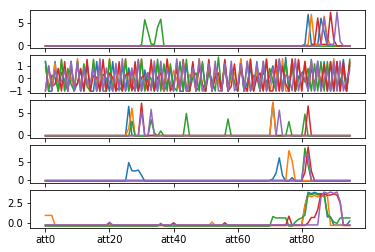

In [80]:
fig, axes = plt.subplots(5, 1)
for ax, label in zip(axes.ravel(), range(1, 6)):
    X_train.iloc[np.where(y_train==label)[0][:5]].T.plot(ax=ax, legend=False)